# Solution to exercise 2.3 of the book Reinforcement Learning an Introduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def run(n_arms, T, Q, q_star, epsilon):
    avg_rwd = np.zeros(T)
    best_action = np.zeros(T)
    for i in range(T):
        # Pick an action
        if np.random.uniform() >= epsilon:
            A = np.argmax(Q[:, 2])
        else:
            A = np.random.choice(np.arange(n_arms))

        # Get a reward
        R = np.random.normal(q_star[A])

        # Update our table
        Q[A][0] = Q[A][0] + R        # Cumulative reward
        Q[A][1] = Q[A][1] + 1        # Number of times this action has been taken
        Q[A][2] = Q[A][0] / Q[A][1]  # Avg reward
        avg_rwd[i] = R
        best_action[i] = (A == np.argmax(q_star))
    return avg_rwd, best_action

In [3]:
def avg_behavior(epsilon):
	iterations = 2000
	T = 10_000
	n_arms = 10
	rewards = np.zeros((iterations, T))
	best_actions = np.zeros((iterations, T))
	for i in range(iterations):
		Q = np.zeros((n_arms, 3))
		q_star = np.random.normal(size=n_arms)
		results = run(n_arms, T, Q, q_star, epsilon)
		rewards[i, :] = results[0]
		best_actions[i, :] = results[1]
	return np.mean(rewards, axis=0), np.mean(best_actions, axis=0)

In [4]:
methods = [0, 0.1, 0.01]
avg_rewards = []
avg_best_actions = []
for m in methods:
	r, ba = avg_behavior(m)
	avg_rewards.append(r)
	avg_best_actions.append(ba)

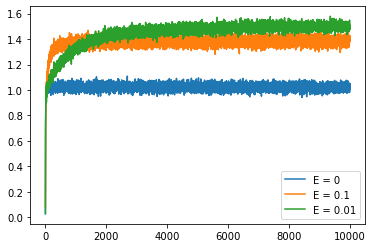

In [7]:
fig = plt.figure()
for i, method in enumerate(methods):
    plt.plot(avg_rewards[i], label=f"E = {method}")
plt.legend()
plt.show()

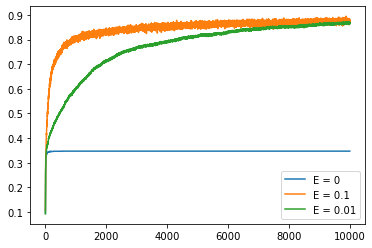

In [8]:
fig2 = plt.figure()
for i, method in enumerate(methods):
    plt.plot(avg_best_actions[i], label=f"E = {method}")
plt.legend()
plt.show()

In [21]:
avg_best_action_001 = avg_best_actions[2].mean()
avg_best_action_001

0.7718457000000001

In [22]:
avg_best_action_01 = avg_best_actions[1].mean()
avg_best_action_01

0.84212205

In [23]:
cum_reward_001 = avg_rewards[2].sum()
cum_reward_001

14427.21951522375

In [24]:
cum_reward_01 = avg_rewards[1].sum()
cum_reward_01

13750.125939491525

In [18]:
print(f"The epsilon = 0.01 method has {(cum_reward_001 - cum_reward_01)/cum_reward_01:0.2%} more reward than the epsilon = 0.1 method in the long term ")

The epsilon = 0.001 method has 4.92% more reward than the epsilon = 0.01 method in the long term 


In [29]:
print(
    f"The epsilon = 0.1 method has selected {(avg_best_action_01 - avg_best_action_001)/avg_best_action_001:0.2%} times more the best action than the epsilon"
    " = 00.1 method in the long term "
)

The epsilon = 0.1 method has selected 9.10% times more the best action than the epsilon = 00.1 method in the long term 
